# Car model recognition
Testing File -->  Visual studio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports

In [1]:

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

tf.random.set_seed(42) # makes output deterministic

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os

plt.rcParams['font.sans-serif'].insert(0, "Inter") 
plt.rcParams['font.size'] = 12 

### Directories of the input and output

In [3]:
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64
DATA_FOLDER = "data"

train_dir = r"C:\Users\agata\Desktop\Resnet_Car_model_recognition\Resnet\DATA\train"
test_dir = r"C:\Users\agata\Desktop\Resnet_Car_model_recognition\Resnet\DATA\test"
checkpoint_dir = r"C:\Users\agata\Desktop\Resnet_Car_model_recognition\Resnet\model"
class_list = os.listdir(train_dir)
num_classes = len(class_list)

for models in class_list:
    print(models.title())

Acura Rl Sedan 2012
Acura Tl Type-S 2008
Acura Tsx Sedan 2012
Acura Zdx Hatchback 2012
Aston Martin Virage Convertible 2012
Audi S4 Sedan 2007
Audi S4 Sedan 2012
Audi Tt Rs Coupe 2012
Audi V8 Sedan 1994
Bentley Continental Gt Coupe 2012
Bmw Activehybrid 5 Sedan 2012
Bmw M3 Coupe 2012
Bmw X3 Suv 2012
Bmw X5 Suv 2007
Bugatti Veyron 16.4 Coupe 2009
Buick Enclave Suv 2012
Cadillac Cts-V Sedan 2012
Cadillac Escalade Ext Crew Cab 2007
Chevrolet Camaro Convertible 2012
Chevrolet Cobalt Ss 2010
Chevrolet Corvette Zr1 2012
Chevrolet Express Cargo Van 2007
Chevrolet Monte Carlo Coupe 2007
Chevrolet Silverado 1500 Regular Cab 2012
Chevrolet Silverado 2500Hd Regular Cab 2012
Chevrolet Sonic Sedan 2012
Chevrolet Tahoe Hybrid Suv 2012
Chevrolet Trailblazer Ss 2009
Chrysler 300 Srt-8 2010
Chrysler Sebring Convertible 2010
Dodge Caliber Wagon 2007
Dodge Caliber Wagon 2012
Dodge Charger Srt-8 2009
Dodge Dakota Club Cab 2007
Dodge Durango Suv 2007
Dodge Durango Suv 2012
Dodge Journey Suv 2012
Ferrari 45

### Loading the model
We trained the model in google colab and downloaded it to test it locally.
The ModelCheckpoint callback we used when trained our model automatically saved the model after each epoch *if and only if* the minimum validation loss (val_loss) improved. Also, the EarlyStopping callback stopped the training if val_loss didn't improve for 8 consecutive epochs in order to avoid overfitting.

As such, we can simply load the latest checkpoint of our model; it's the best iteration of it. After that we deleted all other checkpoints as they are no longer needed.

In [3]:
checkpoints = os.listdir(checkpoint_dir)
checkpoints

['model_removed_new-001-0.0312.hdf5',
 'model_removed_new-002-0.0906.hdf5',
 'model_removed_new-003-0.1328.hdf5',
 'model_removed_new-004-0.2219.hdf5',
 'model_removed_new-005-0.2937.hdf5',
 'model_removed_new-006-0.3422.hdf5',
 'model_removed_new-007-0.4297.hdf5',
 'model_removed_new-008-0.4594.hdf5',
 'model_removed_new-009-0.4969.hdf5',
 'model_removed_new-010-0.5484.hdf5',
 'model_removed_new-011-0.5344.hdf5',
 'model_removed_new-012-0.5828.hdf5',
 'model_removed_new-014-0.5922.hdf5',
 'model_removed_new-015-0.6187.hdf5',
 'model_removed_new-020-0.6406.hdf5',
 'model_removed_new-022-0.6625.hdf5',
 'model_removed_new-023-0.6469.hdf5']

After dropping the other checkpoints...

In [4]:
checkpoints = os.listdir(checkpoint_dir)
checkpoints

['model_removed_new-023-0.6469.hdf5']

In [5]:
# We load the model with the most recent checkpoint
model = load_model(os.path.join(checkpoint_dir, checkpoints[-1])) 
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

### Predicting the test set

In [6]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, shuffle=False)

y_true = test_generator.classes
print(y_true)
predictions = model.predict(test_generator, verbose=True)
y_pred_proba = np.max(predictions, axis=-1)
y_pred = np.argmax(predictions, axis=-1)

Found 3517 images belonging to 87 classes.
[ 0  0  0 ... 86 86 86]
55/55 [==============================] - 475s 9s/step


In [7]:
print(y_pred)

[53  0 54 ... 86 86  3]


#### Classification report gives us 72% accuracy which is pretty good for 91 classes

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from seaborn import color_palette

print(
    classification_report(
        y_true=y_true,
        y_pred=y_pred,
        target_names=[models.title() for models in class_list],
        digits=2,
        zero_division=0
    )
)



                                                 precision    recall  f1-score   support

                            Acura Rl Sedan 2012       0.55      0.50      0.52        32
                           Acura Tl Type-S 2008       0.59      0.48      0.53        42
                           Acura Tsx Sedan 2012       0.61      0.62      0.62        40
                       Acura Zdx Hatchback 2012       0.67      0.41      0.51        39
           Aston Martin Virage Convertible 2012       0.88      0.45      0.60        33
                             Audi S4 Sedan 2007       0.73      0.42      0.54        45
                             Audi S4 Sedan 2012       0.52      0.41      0.46        39
                          Audi Tt Rs Coupe 2012       0.56      0.74      0.64        39
                             Audi V8 Sedan 1994       0.95      0.47      0.62        43
              Bentley Continental Gt Coupe 2012       0.76      0.47      0.58        34
                  Bm

### Predicting an image in "image" folder



In [9]:
models_titles = [models.title() for models in class_list]
models_titles

['Acura Rl Sedan 2012',
 'Acura Tl Type-S 2008',
 'Acura Tsx Sedan 2012',
 'Acura Zdx Hatchback 2012',
 'Aston Martin Virage Convertible 2012',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi Tt Rs Coupe 2012',
 'Audi V8 Sedan 1994',
 'Bentley Continental Gt Coupe 2012',
 'Bmw Activehybrid 5 Sedan 2012',
 'Bmw M3 Coupe 2012',
 'Bmw X3 Suv 2012',
 'Bmw X5 Suv 2007',
 'Bugatti Veyron 16.4 Coupe 2009',
 'Buick Enclave Suv 2012',
 'Cadillac Cts-V Sedan 2012',
 'Cadillac Escalade Ext Crew Cab 2007',
 'Chevrolet Camaro Convertible 2012',
 'Chevrolet Cobalt Ss 2010',
 'Chevrolet Corvette Zr1 2012',
 'Chevrolet Express Cargo Van 2007',
 'Chevrolet Monte Carlo Coupe 2007',
 'Chevrolet Silverado 1500 Regular Cab 2012',
 'Chevrolet Silverado 2500Hd Regular Cab 2012',
 'Chevrolet Sonic Sedan 2012',
 'Chevrolet Tahoe Hybrid Suv 2012',
 'Chevrolet Trailblazer Ss 2009',
 'Chrysler 300 Srt-8 2010',
 'Chrysler Sebring Convertible 2010',
 'Dodge Caliber Wagon 2007',
 'Dodge Caliber Wagon 2012',
 'D

Found 1 images belonging to 1 classes.
1/1 [==============================] - 1s 586ms/step
['C:\\Users\\agata\\Desktop\\ds-final_project\\ds-final_project\\DATA\\image\\2010-Chevrolet-Cobalt-FrontSide_CHCOBSSC101_505x375.jpg']


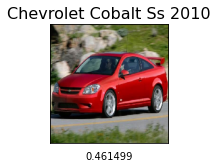

In [12]:
# ImageDataGenerator 
extra_dir = r"C:\Users\agata\Desktop\Resnet_Car_model_recognition\Resnet\DATA\image"
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# iterator
extra_generator = datagen.flow_from_directory(
        directory = r"C:\Users\agata\Desktop\Resnet_Car_model_recognition\Resnet\DATA",
        classes=["image"],
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        shuffle=False
    )

# Predict labels
y_true = extra_generator.classes
predictions = model.predict(extra_generator, verbose=True)
y_pred_proba = np.max(predictions, axis=-1)
y_pred = np.argmax(predictions, axis=-1)

extra_img_paths = [os.path.join(extra_dir, filename)
                    for filename in os.listdir(extra_dir)]
print(extra_img_paths)
# Plot results
n_samples = len(extra_img_paths)
fig, axes = plt.subplots( figsize=(n_samples*2, 4))

img = load_img(extra_img_paths[0], target_size=(IMG_HEIGHT, IMG_WIDTH))
axes.imshow(img)
axes.set_xticks([])
axes.set_yticks([])
axes.set_xlabel(f"{y_pred_proba[0]:.6f}") # predicted label + probability
# Display model's name above middle image of each row
axes.set_title(models_titles[y_pred[0]], fontsize='16', fontweight='medium')
fig.set_facecolor('white')
fig.tight_layout()
plt.show()